# Data Understanding

In diesem Notebook wird der Datensatz analysiert und verstanden. Folgende Aspekte werden untersucht:
- Datenqualität (Null-Werte, Inkonsistenzen)
- Datenverteilung und Balance
- Statistische Kennzahlen
- Visualisierungen
- Zeitreihenanalyse

## 1. Setup und Daten einlesen

In [94]:
# Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einlesen
df = pd.read_csv('../../../data/Big_Black_Money_Dataset.csv')

# Datumspalte konvertieren und als Index setzen
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])
df = df.set_index('Date of Transaction')

# Float-Formatierung einstellen
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [95]:
# Erste Zeilen anzeigen
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
Date of Transaction,,,,,,,,,,,,,
2013-01-01 00:00:00,TX0000000001,Brazil,"3,267,530.48",Offshore Transfer,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
2013-01-01 01:00:00,TX0000000002,China,"4,965,766.73",Stocks Transfer,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2013-01-01 02:00:00,TX0000000003,UK,"94,167.50",Stocks Transfer,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
2013-01-01 03:00:00,TX0000000004,UAE,"386,420.14",Cash Withdrawal,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
2013-01-01 04:00:00,TX0000000005,South Africa,"643,378.43",Cryptocurrency,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [96]:
# Datenstruktur anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2013-01-01 00:00:00 to 2014-02-21 15:00:00
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Person Involved              10000 non-null  object 
 5   Industry                     10000 non-null  object 
 6   Destination Country          10000 non-null  object 
 7   Reported by Authority        10000 non-null  bool   
 8   Source of Money              10000 non-null  object 
 9   Money Laundering Risk Score  10000 non-null  int64  
 10  Shell Companies Involved     10000 non-null  int64  
 11  Financial Institution        10000 non-null  object 
 12  Tax Haven Country            10000 non-

**Erkenntnisse:**
- 10.000 Transaktionen im Datensatz
- Keine Null-Werte vorhanden
- 3 numerische Variablen: Amount (USD), Money Laundering Risk Score, Shell Companies Involved
- 1 Boolean-Variable: Reported by Authority
- Zeitraum: 01.01.2013 bis 21.02.2014 (ca. 1,1 Jahre)

## 2. Datenqualität prüfen

### Inkonsistenzen in kategorialen Variablen

In [97]:
# Einzigartige Werte in wichtigen Spalten prüfen
for col in ["Transaction Type", "Industry", "Source of Money", "Country", "Destination Country", "Tax Haven Country"]:
    print(f"\n{col}:")
    print(df[col].unique())


Transaction Type:
['Offshore Transfer' 'Stocks Transfer' 'Cash Withdrawal' 'Cryptocurrency'
 'Property Purchase']

Industry:
['Construction' 'Luxury Goods' 'Oil & Gas' 'Real Estate' 'Arms Trade'
 'Casinos' 'Finance']

Source of Money:
['Illegal' 'Legal']

Country:
['Brazil' 'China' 'UK' 'UAE' 'South Africa' 'Russia' 'Switzerland' 'India'
 'USA' 'Singapore']

Destination Country:
['USA' 'South Africa' 'Switzerland' 'Russia' 'Brazil' 'UK' 'India' 'China'
 'Singapore' 'UAE']

Tax Haven Country:
['Singapore' 'Bahamas' 'Switzerland' 'Panama' 'Luxembourg'
 'Cayman Islands']


**Erkenntnisse:**
- Keine Inkonsistenzen in der Schreibweise (z.B. "UK" vs. "United Kingdom")
- Alle Kategorien sind einheitlich benannt

## 3. Datenverteilung und Balance

In [98]:
# Verteilung wichtiger kategorialer Variablen
cols_to_check = ["Country", "Industry", "Transaction Type", "Source of Money", "Reported by Authority"]

for col in cols_to_check:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Verhältnis: {df[col].value_counts(normalize=True).round(3).to_dict()}")


Country:
Country
China           1038
South Africa    1026
UK              1014
Brazil          1006
Russia           997
Singapore        995
India            990
Switzerland      985
UAE              976
USA              973
Name: count, dtype: int64
Verhältnis: {'China': 0.104, 'South Africa': 0.103, 'UK': 0.101, 'Brazil': 0.101, 'Russia': 0.1, 'Singapore': 0.1, 'India': 0.099, 'Switzerland': 0.098, 'UAE': 0.098, 'USA': 0.097}

Industry:
Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64
Verhältnis: {'Finance': 0.148, 'Construction': 0.146, 'Luxury Goods': 0.146, 'Real Estate': 0.144, 'Arms Trade': 0.141, 'Casinos': 0.138, 'Oil & Gas': 0.137}

Transaction Type:
Transaction Type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64
Verhältnis: {'Property

**Erkenntnisse:**
- **Länder**: Relativ ausgewogen verteilt (ca. 1000 Transaktionen pro Land)
- **Industrien**: Relativ ausgewogen (1372-1475 Transaktionen)
- **Source of Money**: Starke Unbalance - 70% illegal, 30% legal
- **Reported by Authority**: Starke Unbalance - 80% nicht gemeldet, 20% gemeldet

⚠️ **Wichtig für Modellierung**: Die starke Unbalance bei "Source of Money" und "Reported by Authority" muss beim Training berücksichtigt werden!

## 4. Statistische Analyse

In [99]:
# Deskriptive Statistik für numerische Variablen
df.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,"10,000.00","10,000.00","10,000.00"
mean,"2,501,817.66",5.53,4.47
std,"1,424,364.28",2.89,2.88
min,"10,031.80",1.00,0.00
25%,"1,279,005.28",3.00,2.00
50%,"2,501,310.40",6.00,4.00
75%,"3,722,416.45",8.00,7.00
max,"4,999,812.41",10.00,9.00


**Erkenntnisse:**
- Transaktionsbeträge: Durchschnitt 2,5 Mio. USD, Range 10k - 5 Mio. USD
- Money Laundering Risk Score: Durchschnitt 5,5 (Skala 1-10), gleichmäßig verteilt
- Shell Companies: Durchschnitt 4,5 (Range 0-9)

### Korrelationen zwischen numerischen Variablen

In [100]:
# Korrelationsmatrix
print("Korrelationen:")
print(f"Amount vs Risk Score: {df['Amount (USD)'].corr(df['Money Laundering Risk Score']):.4f}")
print(f"Amount vs Shell Companies: {df['Amount (USD)'].corr(df['Shell Companies Involved']):.4f}")
print(f"Shell Companies vs Risk Score: {df['Shell Companies Involved'].corr(df['Money Laundering Risk Score']):.4f}")

Korrelationen:
Amount vs Risk Score: 0.0165
Amount vs Shell Companies: -0.0179
Shell Companies vs Risk Score: -0.0193


**Erkenntnisse:**
- Alle Korrelationen nahe 0 → keine lineare Abhängigkeit zwischen numerischen Variablen
- Der Risk Score lässt sich nicht einfach aus Betrag oder Anzahl Shell Companies ableiten
- Kategoriale Features (Land, Industrie, etc.) sind wahrscheinlich wichtiger für Vorhersagen

## 5. Visualisierungen

### Verteilung der numerischen Variablen

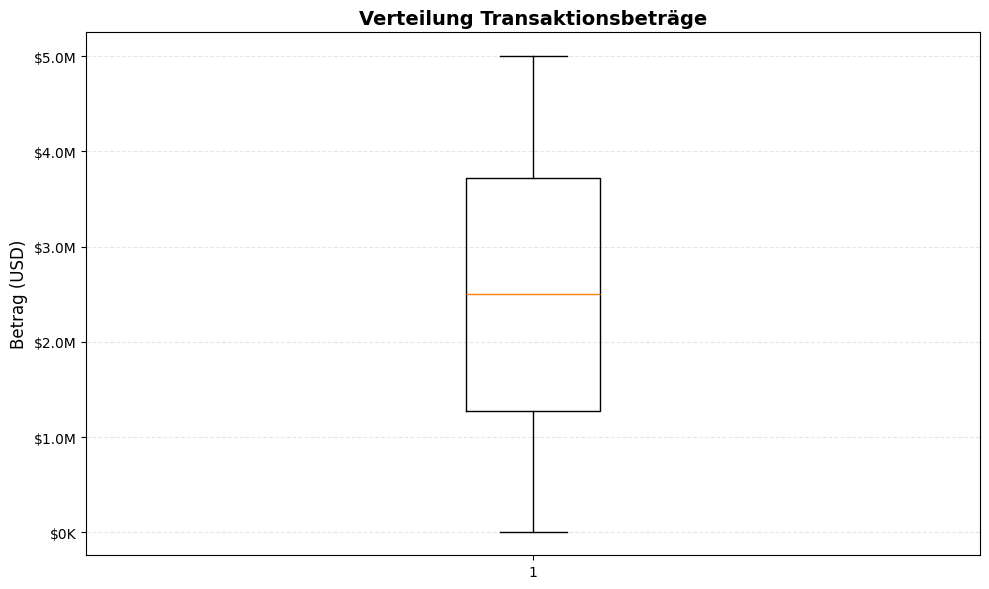

In [101]:
# Boxplot für Transaktionsbeträge
plt.figure(figsize=(10, 6))
red_circle = dict(markerfacecolor='red', marker='o', markersize=4)
plt.boxplot(df['Amount (USD)'], whis=1.5, flierprops=red_circle, vert=True)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x / 1e6:.1f}M' if x >= 1e6 else f'${x / 1e3:.0f}K'))

plt.title('Verteilung Transaktionsbeträge', fontsize=14, fontweight='bold')
plt.ylabel('Betrag (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

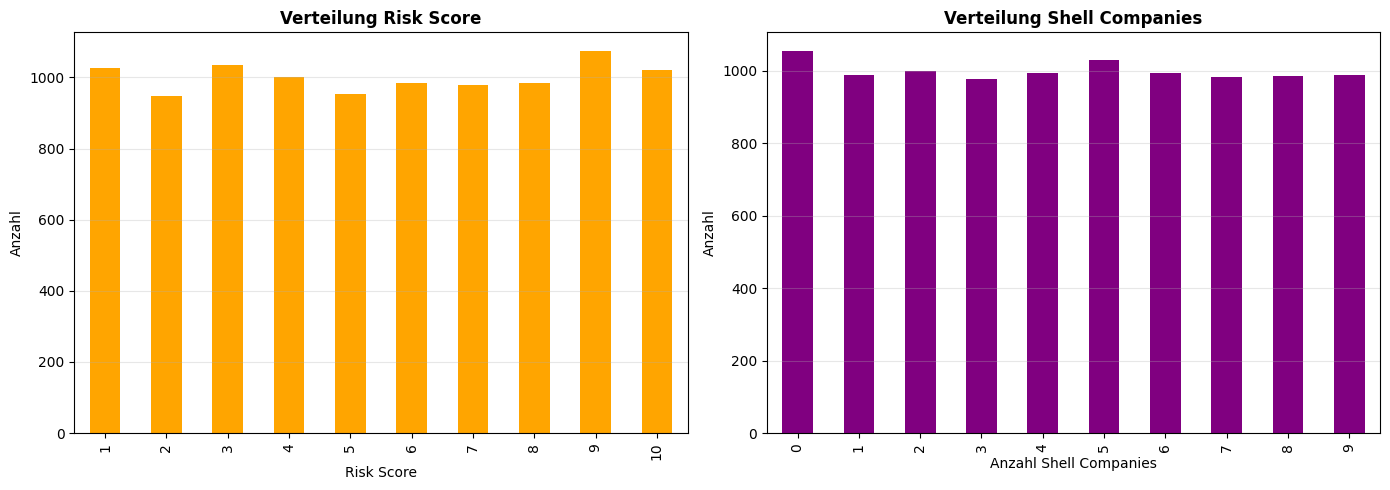

In [102]:
# Verteilung Risk Score und Shell Companies
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['Money Laundering Risk Score'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Verteilung Risk Score', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Risk Score')
axes[0].set_ylabel('Anzahl')
axes[0].grid(axis='y', alpha=0.3)

df['Shell Companies Involved'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Verteilung Shell Companies', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Anzahl Shell Companies')
axes[1].set_ylabel('Anzahl')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Beträge nach Industrie und Transaktionstyp

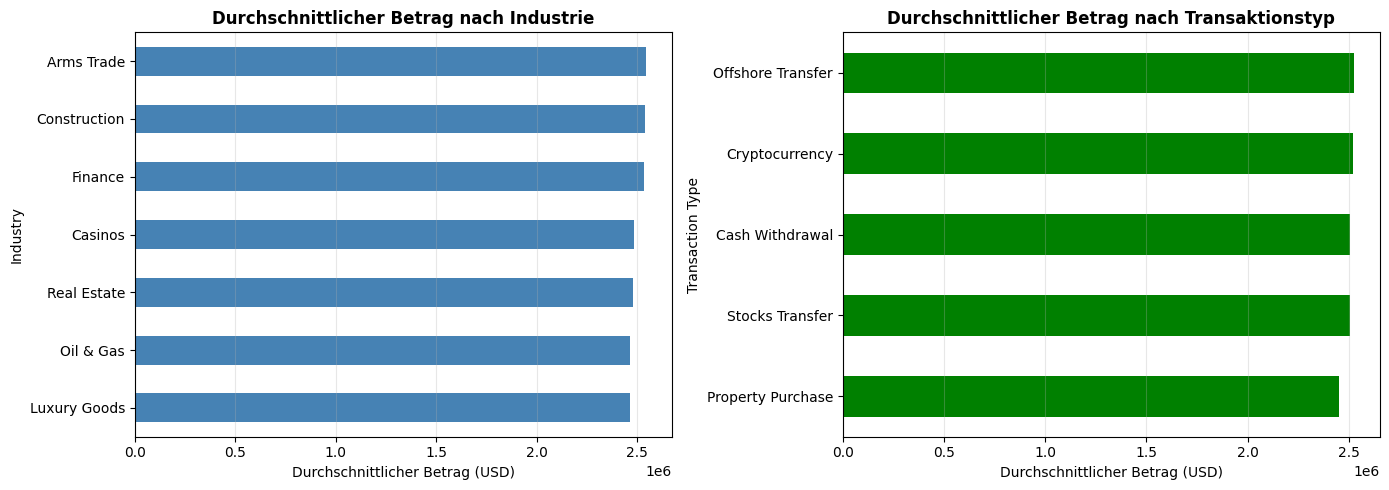

In [103]:
# Durchschnittliche Beträge nach Industrie
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.groupby("Industry")["Amount (USD)"].mean().sort_values().plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Durchschnittlicher Betrag nach Industrie', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Durchschnittlicher Betrag (USD)')
axes[0].grid(axis='x', alpha=0.3)

df.groupby("Transaction Type")["Amount (USD)"].mean().sort_values().plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Durchschnittlicher Betrag nach Transaktionstyp', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Durchschnittlicher Betrag (USD)')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Zeitreihenanalyse

### Übersicht Transaktionen über Zeit

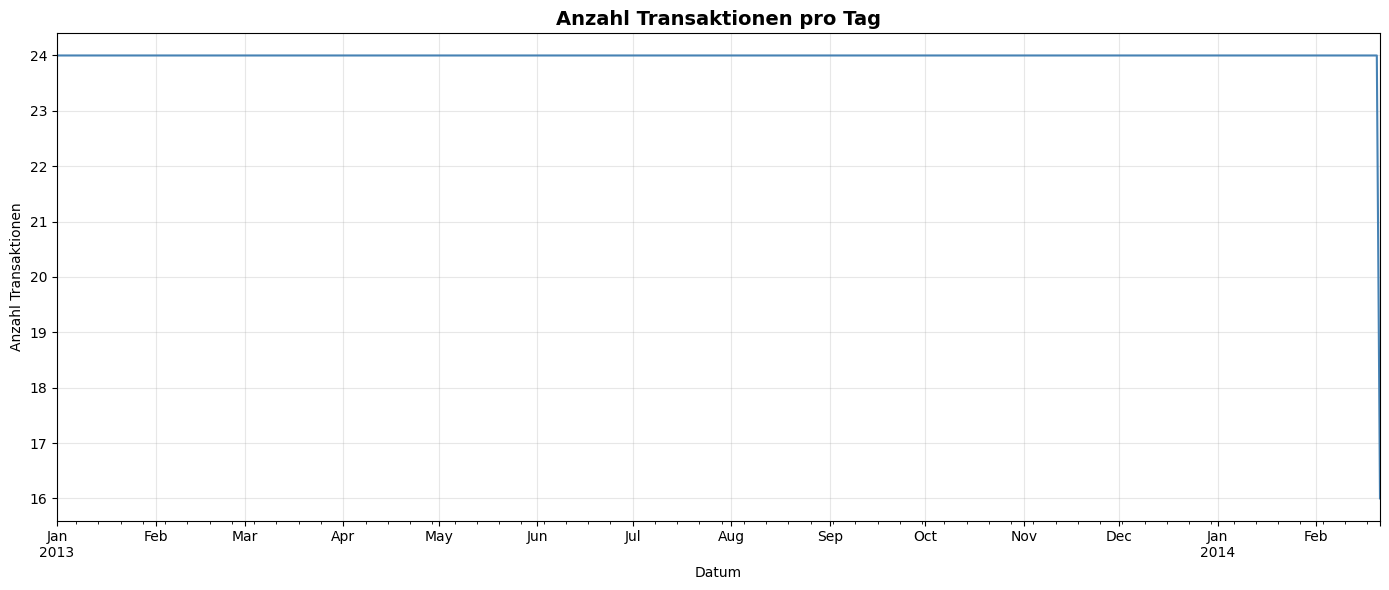

Durchschnittlich 24.0 Transaktionen pro Tag
Zeitraum: 01.01.2013 bis 21.02.2014


In [105]:
# Transaktionen pro Tag
transactions_per_day = df.resample('D').size()

transactions_per_day.plot(figsize=(14, 6), color='steelblue')
plt.title('Anzahl Transaktionen pro Tag', fontsize=14, fontweight='bold')
plt.ylabel('Anzahl Transaktionen')
plt.xlabel('Datum')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Durchschnittlich {transactions_per_day.mean():.1f} Transaktionen pro Tag")
print(f"Zeitraum: {df.index.min().strftime('%d.%m.%Y')} bis {df.index.max().strftime('%d.%m.%Y')}")

### Tägliche Metriken

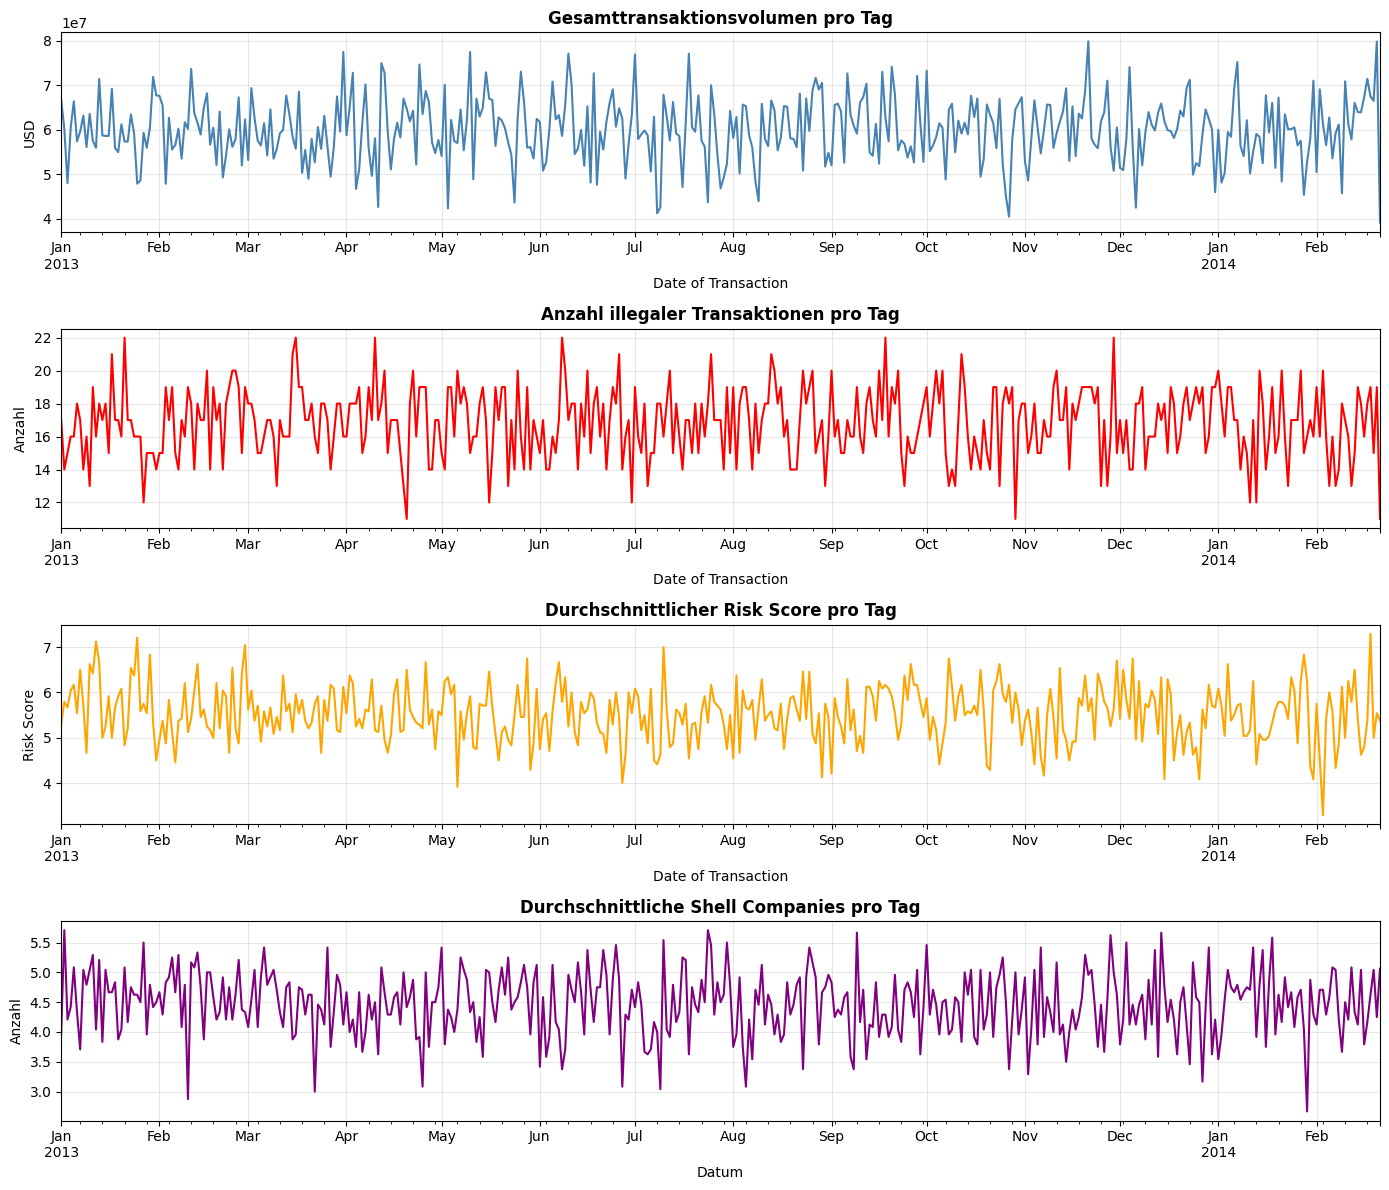

In [106]:
# Tägliche Aggregation
df_daily = df.resample('D').agg({
    'Amount (USD)': 'sum',
    'Source of Money': lambda x: (x == 'Illegal').sum(),
    'Money Laundering Risk Score': 'mean',
    'Shell Companies Involved': 'mean'
})
df_daily.columns = ['Total_Amount', 'Illegal_Count', 'Avg_Risk', 'Avg_Shell_Companies']

# Visualisierung
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

df_daily['Total_Amount'].plot(ax=axes[0], color='steelblue')
axes[0].set_title('Gesamttransaktionsvolumen pro Tag', fontsize=12, fontweight='bold')
axes[0].set_ylabel('USD')
axes[0].grid(True, alpha=0.3)

df_daily['Illegal_Count'].plot(ax=axes[1], color='red')
axes[1].set_title('Anzahl illegaler Transaktionen pro Tag', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Anzahl')
axes[1].grid(True, alpha=0.3)

df_daily['Avg_Risk'].plot(ax=axes[2], color='orange')
axes[2].set_title('Durchschnittlicher Risk Score pro Tag', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Risk Score')
axes[2].grid(True, alpha=0.3)

df_daily['Avg_Shell_Companies'].plot(ax=axes[3], color='purple')
axes[3].set_title('Durchschnittliche Shell Companies pro Tag', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Anzahl')
axes[3].grid(True, alpha=0.3)

plt.xlabel('Datum')
plt.tight_layout()
plt.show()

## 7. Zusammenfassung und Schlussfolgerungen

### Wichtigste Erkenntnisse:

**Datenqualität:**
- ✅ Keine fehlenden Werte
- ✅ Keine Inkonsistenzen in Schreibweisen
- ✅ Daten sind sauber und bereit für Modellierung

**Datenverteilung:**
- Länder und Industrien sind relativ ausgewogen verteilt
- ⚠️ Starke Klassenunbalance: 70% illegal vs. 30% legal
- ⚠️ Starke Klassenunbalance: 80% nicht gemeldet vs. 20% gemeldet

**Numerische Variablen:**
- Transaktionsbeträge: 10k - 5 Mio. USD (Durchschnitt 2,5 Mio.)
- Keine Korrelation zwischen numerischen Variablen
- Kategoriale Features sind wichtiger als numerische

**Zeitliche Verteilung:**
- Konstant ca. 24 Transaktionen pro Tag
- Keine saisonalen Muster erkennbar
- Zeitraum: 1,1 Jahre (Jan 2013 - Feb 2014)

**Limitationen:**
- Datensatz umfasst nur spezifische Länder und Industrien
- Nur große Transaktionen (> 10k USD)
- Ergebnisse nicht auf andere Kontexte generalisierbar
- Keine Information über die Herkunft des Risk Scores